In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

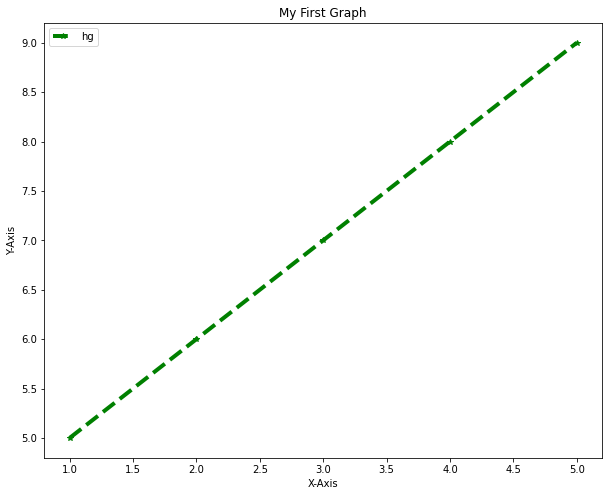

In [5]:
a= [1,2,3,4,5]
b= [5,6,7,8,9]

plt.figure(figsize=(10,8))
plt.plot(a,b,"--g", linewidth=4, label= "hg", marker="*")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("My First Graph")
plt.legend()
plt.savefig("mygraph.png",dpi=100);

In [7]:
!pip install pygame

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 13.8 MB 373 kB/s            


In [10]:
!pip install altair

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 727 kB 620 kB/s            
     |████████████████████████████████| 55 kB 1.1 MB/s             


In [11]:
import pandas as pd
import altair as alt

In [12]:
df = pd.read_csv('GLB.Ts_dSST.csv', skiprows = 1)
df['Year_full'] = pd.to_datetime(df['Year'], format='%Y')

In [13]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year_full
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20,1880-01-01
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18,1881-01-01
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17,1882-01-01
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19,1883-01-01
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27,1884-01-01


In [14]:
dfs = df[['Year','Year_full','J-D']]

In [15]:
dfs

,Year,Year_full,J-D
0,1880,1880-01-01,-0.19
1,1881,1881-01-01,-0.10
2,1882,1882-01-01,-0.10
3,1883,1883-01-01,-0.19
4,1884,1884-01-01,-0.29
...,...,...,...
133,2013,2013-01-01,0.64
134,2014,2014-01-01,0.73
135,2015,2015-01-01,0.86
136,2016,2016-01-01,0.99


In [16]:
text_1top = alt.Chart(pd.DataFrame({'text': ['Annual Global Surface Temperature,']})
                ).mark_text(size = 15,
                            color = '#000000',
                            align='left',
                            x = 12, y = 15,
                            fontWeight = 'bold',
                            font = 'HERMAN').encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)


text_2top = alt.Chart(pd.DataFrame({'text': ['Relative to Late 19th Century Average']})
                ).mark_text(size = 15,
                            color = '#000000',
                            align='left',
                            x = 12, y = 35,
                            fontWeight = 'bold',
                            font = 'HERMAN',
                           ).encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)

text_1bottom = alt.Chart(pd.DataFrame({'text': ['HOTTER THAN THE']})
                ).mark_text(size = 11,
                            color = '#000000',
                            x = 802, y = 252
                           ).encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)


text_2bottom = alt.Chart(pd.DataFrame({'text': ['1880-1899 AVERAGE']})
                ).mark_text(size = 11,
                            color = '#000000',
                            x = 800, y = 265
                           ).encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)


text_3bottom = alt.Chart(pd.DataFrame({'text': ['COLDER']})
                ).mark_text(size = 11,
                            color = '#000000',
                            x = 830, y = 295
                           ).encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)

text_bottom = alt.Chart(pd.DataFrame({'text': ['Source: NASA']})
                ).mark_text(size = 10,
                            color = '#808080',
                            x= -10, y=495
                           ).encode(
    text = alt.Text(field = 'text',
                   type = 'nominal')
)

In [17]:
rule = alt.Chart(pd.DataFrame({'line': [0]})).mark_rule(color='grey').encode(y='line')



years_right = alt.Chart(dfs).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dx = 7
).encode(
    x=alt.X('Year_full:T', axis=alt.Axis(title='')),
    y='J-D:Q',
    text='Year').transform_filter(
    alt.FieldOneOfPredicate(field='Year', oneOf=[1944, 2014, 2015, 2017])
)

years_left = alt.Chart(dfs).mark_text(
    align='right',
    baseline='middle',
    fontSize = 12,
    dx = -7
).encode(
    x=alt.X('Year_full:T',axis=alt.Axis(title='')),
    y='J-D:Q',
    text='Year').transform_filter(
    alt.FieldOneOfPredicate(field='Year', oneOf=[1904, 1998])
)

year_bold = alt.Chart(dfs).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dx = 7,
    fontStyle='bold'
).encode(
    x=alt.X('Year_full:T', axis=alt.Axis(title='')),
    y='J-D:Q',
    text='Year').transform_filter(
    alt.FieldOneOfPredicate(field='Year', oneOf=[2016])
)

In [18]:
base = alt.Chart(dfs).mark_point(filled = True, color = '#ff6f00', stroke = '#5e5e5e', opacity = 0.9,size = 70).encode(
        x = alt.X('Year_full:T', 
              scale = alt.Scale(zero = False),
              title=''),
        y = alt.Y('J-D:Q',
              axis=alt.Axis(labelColor='#b0b0b0', format='+'),
              title= '')
)

In [19]:
chart = alt.layer(base, rule, text_1top, text_2top, text_1bottom, text_2bottom, text_3bottom, text_bottom, years_right, years_left, year_bold).properties(
    width = 850,
    height = 450,
    background = '#FFFFFF',
    padding = 20).configure_axis(
                    labelColor = 'grey',
                    labelFont = 'Myriad Pro Regular',
                    labelFontSize = 12,
                    tickOpacity = 0,
                    domain=False).configure_view(strokeWidth=0)

In [21]:
!pip install altair-viewer


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 562 kB 169 kB/s            


In [ ]:
chart.show()

Displaying chart at http://localhost:18583/
